In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [17]:
df = pd.read_csv("train_data.csv")
print(f"Approval rate: {df['project_is_approved'].mean():.2%}")

Approval rate: 84.86%


In [18]:
state_stats = df.groupby('school_state').agg({
    'project_is_approved': ['count', 'mean', 'sum']
}).round(3)

state_stats.columns = ['Total_Projects', 'Approval_Rate', 'Approved_Count']
state_stats['Rejected_Count'] = state_stats['Total_Projects'] - state_stats['Approved_Count']

min_projects = max(50, len(df) * 0.005)  # At least 0.5% of total or 50 projects
significant_states = state_stats[state_stats['Total_Projects'] >= min_projects]
significant_states = significant_states.sort_values('Approval_Rate', ascending=False)

large_figsize = (8,6)


In [19]:
state_approval_data = significant_states.reset_index().copy()
state_approval_data.rename(columns={'school_state': 'State'}, inplace=True)

fig = px.choropleth(
    state_approval_data,
    locations='State',
    locationmode="USA-states",
    color='Approval_Rate',
    color_continuous_scale='RdYlGn',  # Red = low, Green = high
    scope="usa",
    title="U.S. Map: Project Approval Rates by State",
    hover_data={
        'State': True,
        'Approval_Rate': ':.2%',
        'Total_Projects': True,
        'Approved_Count': True,
        'Rejected_Count': True
    }
)

fig.update_layout(
    geo=dict(showlakes=True, lakecolor='lightblue'),
    title_font=dict(size=20, family='Arial', color='black'),
    margin=dict(l=20, r=20, t=50, b=20)
)

fig.show()


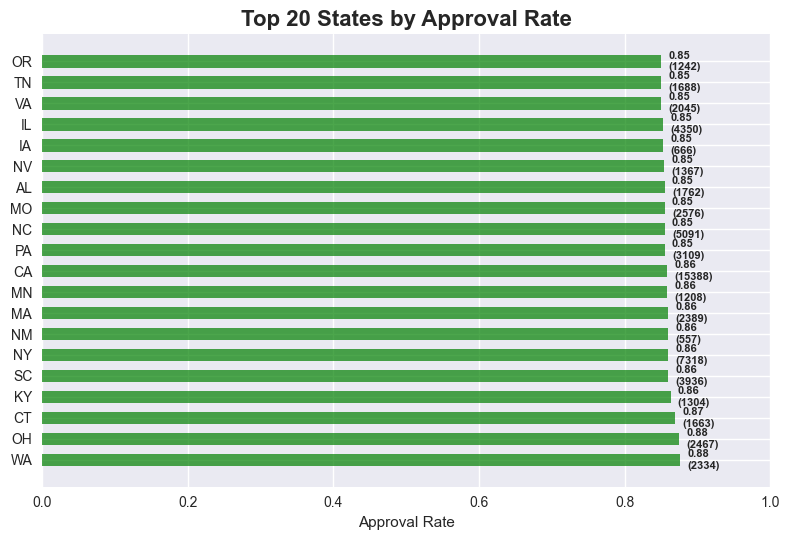

In [20]:
# 1.Top 20 States by Approval Rate
top_20 = significant_states.head(20)
plt.barh(top_20.index, top_20['Approval_Rate'], color='green', alpha=0.7, height=0.6)
plt.title('Top 20 States by Approval Rate', fontsize=16, fontweight='bold')
plt.xlabel('Approval Rate')
for i, (state, data) in enumerate(top_20.iterrows()):
    plt.text(data['Approval_Rate'] + 0.01, i, 
             f'{data["Approval_Rate"]:.2f}\n({int(data["Total_Projects"])})', 
             va='center', fontweight='bold', fontsize=8)
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

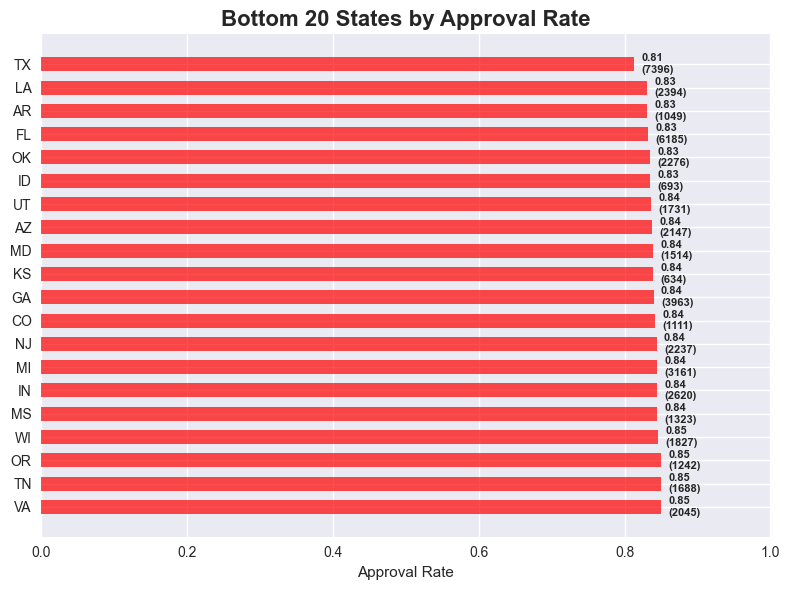

In [21]:
# 2. Bottom 20 States by Approval Rate
plt.figure(figsize=large_figsize)
bottom_20 = significant_states.tail(20)
plt.barh(bottom_20.index, bottom_20['Approval_Rate'], color='red', alpha=0.7, height=0.6)
plt.title('Bottom 20 States by Approval Rate', fontsize=16, fontweight='bold')
plt.xlabel('Approval Rate')
for i, (state, data) in enumerate(bottom_20.iterrows()):
    plt.text(data['Approval_Rate'] + 0.01, i, 
             f'{data["Approval_Rate"]:.2f}\n({int(data["Total_Projects"])})', 
             va='center', fontweight='bold', fontsize=8)
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

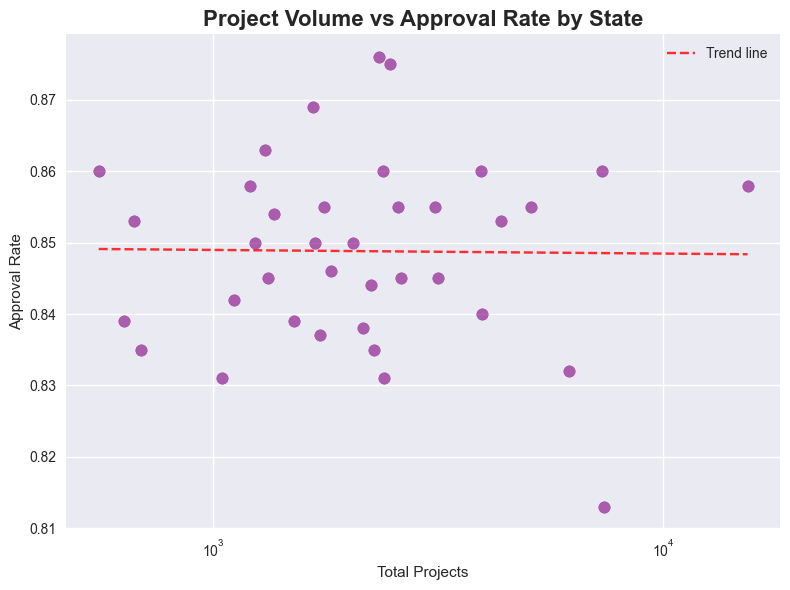

In [23]:
plt.figure(figsize=large_figsize)
plt.scatter(significant_states['Total_Projects'], significant_states['Approval_Rate'], 
            alpha=0.6, s=70, color='purple')
plt.title('Project Volume vs Approval Rate by State', fontsize=16, fontweight='bold')
plt.xlabel('Total Projects')
plt.ylabel('Approval Rate')
plt.xscale('log')

# Adding trend line
log_projects = np.log(significant_states['Total_Projects'])
z = np.polyfit(log_projects, significant_states['Approval_Rate'], 1)
p = np.poly1d(z)
sorted_projects = np.sort(significant_states['Total_Projects'])
plt.plot(sorted_projects, p(np.log(sorted_projects)), "r--", alpha=0.8, label='Trend line')
plt.legend()
plt.tight_layout()
plt.show()

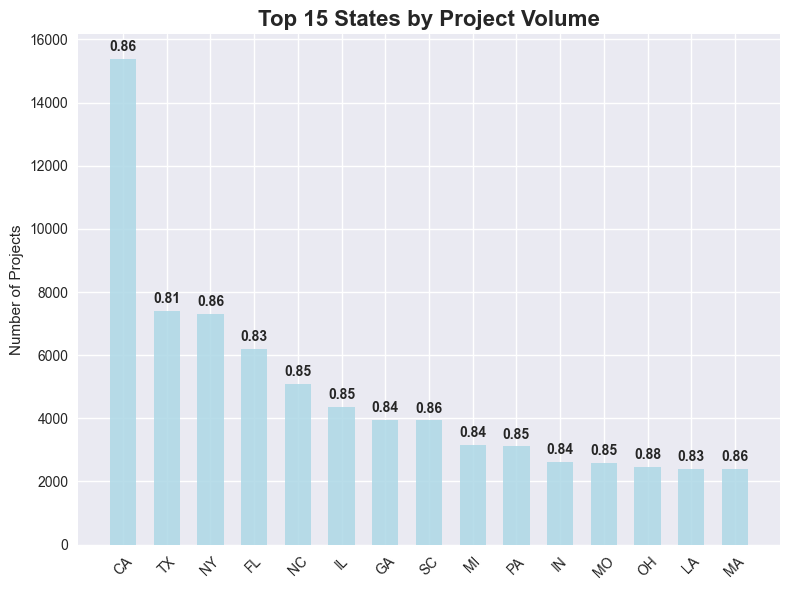

In [24]:
# 4. Top 15 States by Project Volume
plt.figure(figsize=large_figsize)
top_volume_states = significant_states.nlargest(15, 'Total_Projects')
plt.bar(top_volume_states.index, top_volume_states['Total_Projects'], 
        color='lightblue', alpha=0.85, width=0.6)
plt.title('Top 15 States by Project Volume', fontsize=16, fontweight='bold')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
for i, (projects, rate) in enumerate(zip(top_volume_states['Total_Projects'], 
                                         top_volume_states['Approval_Rate'])):
    plt.text(i, projects + max(top_volume_states['Total_Projects']) * 0.01, 
             f'{rate:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()

In [25]:
print("="*60)
print("SCHOOL STATE vs APPROVAL ANALYSIS")
print("="*60)
print(f"Total states: {len(state_stats)}")
print(f"States with significant data: {len(significant_states)}")
print(f"Overall approval rate: {df['project_is_approved'].mean():.2%}")

print(f"\nTop 5 performing states:")
print(significant_states[['Total_Projects', 'Approval_Rate']].head())

print(f"\nTop 5 states by volume:")
print(significant_states.nlargest(5, 'Total_Projects')[['Total_Projects', 'Approval_Rate']])

SCHOOL STATE vs APPROVAL ANALYSIS
Total states: 51
States with significant data: 37
Overall approval rate: 84.86%

Top 5 performing states:
              Total_Projects  Approval_Rate
school_state                               
WA                      2334          0.876
OH                      2467          0.875
CT                      1663          0.869
KY                      1304          0.863
SC                      3936          0.860

Top 5 states by volume:
              Total_Projects  Approval_Rate
school_state                               
CA                     15388          0.858
TX                      7396          0.813
NY                      7318          0.860
FL                      6185          0.832
NC                      5091          0.855
